<a href="https://colab.research.google.com/github/laplezeda/neural-network-from-scratch/blob/main/imdb_movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB movie review sentiment dataset

## importing requierd libraries and data

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [80]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)
x_train , x_valid , y_train , y_valid = train_test_split(x_train_full , y_train_full , random_state=42)

## checking the data

In [ ]:
len(x_train_full)

25000

In [ ]:
x_train.dtype

dtype('O')

In [ ]:
len(x_train)

18750

In [ ]:
len(x_valid)

6250

In [ ]:
len(x_test)

25000

In [ ]:
x_train.shape

(18750,)

In [ ]:
y_train

array([1, 1, 1, ..., 0, 0, 1])

## data preparation

### padding the data so the nn can take it as a input

In [81]:
maxlen = 200
x_train_padded =  keras.utils.pad_sequences(x_train,maxlen)
x_test_padded = keras.utils.pad_sequences(x_test,maxlen)
x_valid_padded = keras.utils.pad_sequences(x_valid,maxlen)

## now lets build our nn architecture

In [90]:
model = keras.models.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=maxlen), # Add Embedding layer
    keras.layers.Flatten(),  # Flatten the output of the Embedding layer
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [93]:
model.compile(
 optimizer = "adam", # Change optimizer to Adam
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

In [94]:
history = model.fit(
    x_train_padded, y_train,  # Use padded training data
    epochs = 2,
    batch_size = 500,
    validation_data = (x_valid_padded, y_valid)  # Use padded validation data
)

Epoch 1/2
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 207ms/step - accuracy: 0.5527 - loss: 0.6833 - val_accuracy: 0.8069 - val_loss: 0.4246
Epoch 2/2
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 194ms/step - accuracy: 0.8834 - loss: 0.3032 - val_accuracy: 0.8394 - val_loss: 0.3623


In [91]:
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

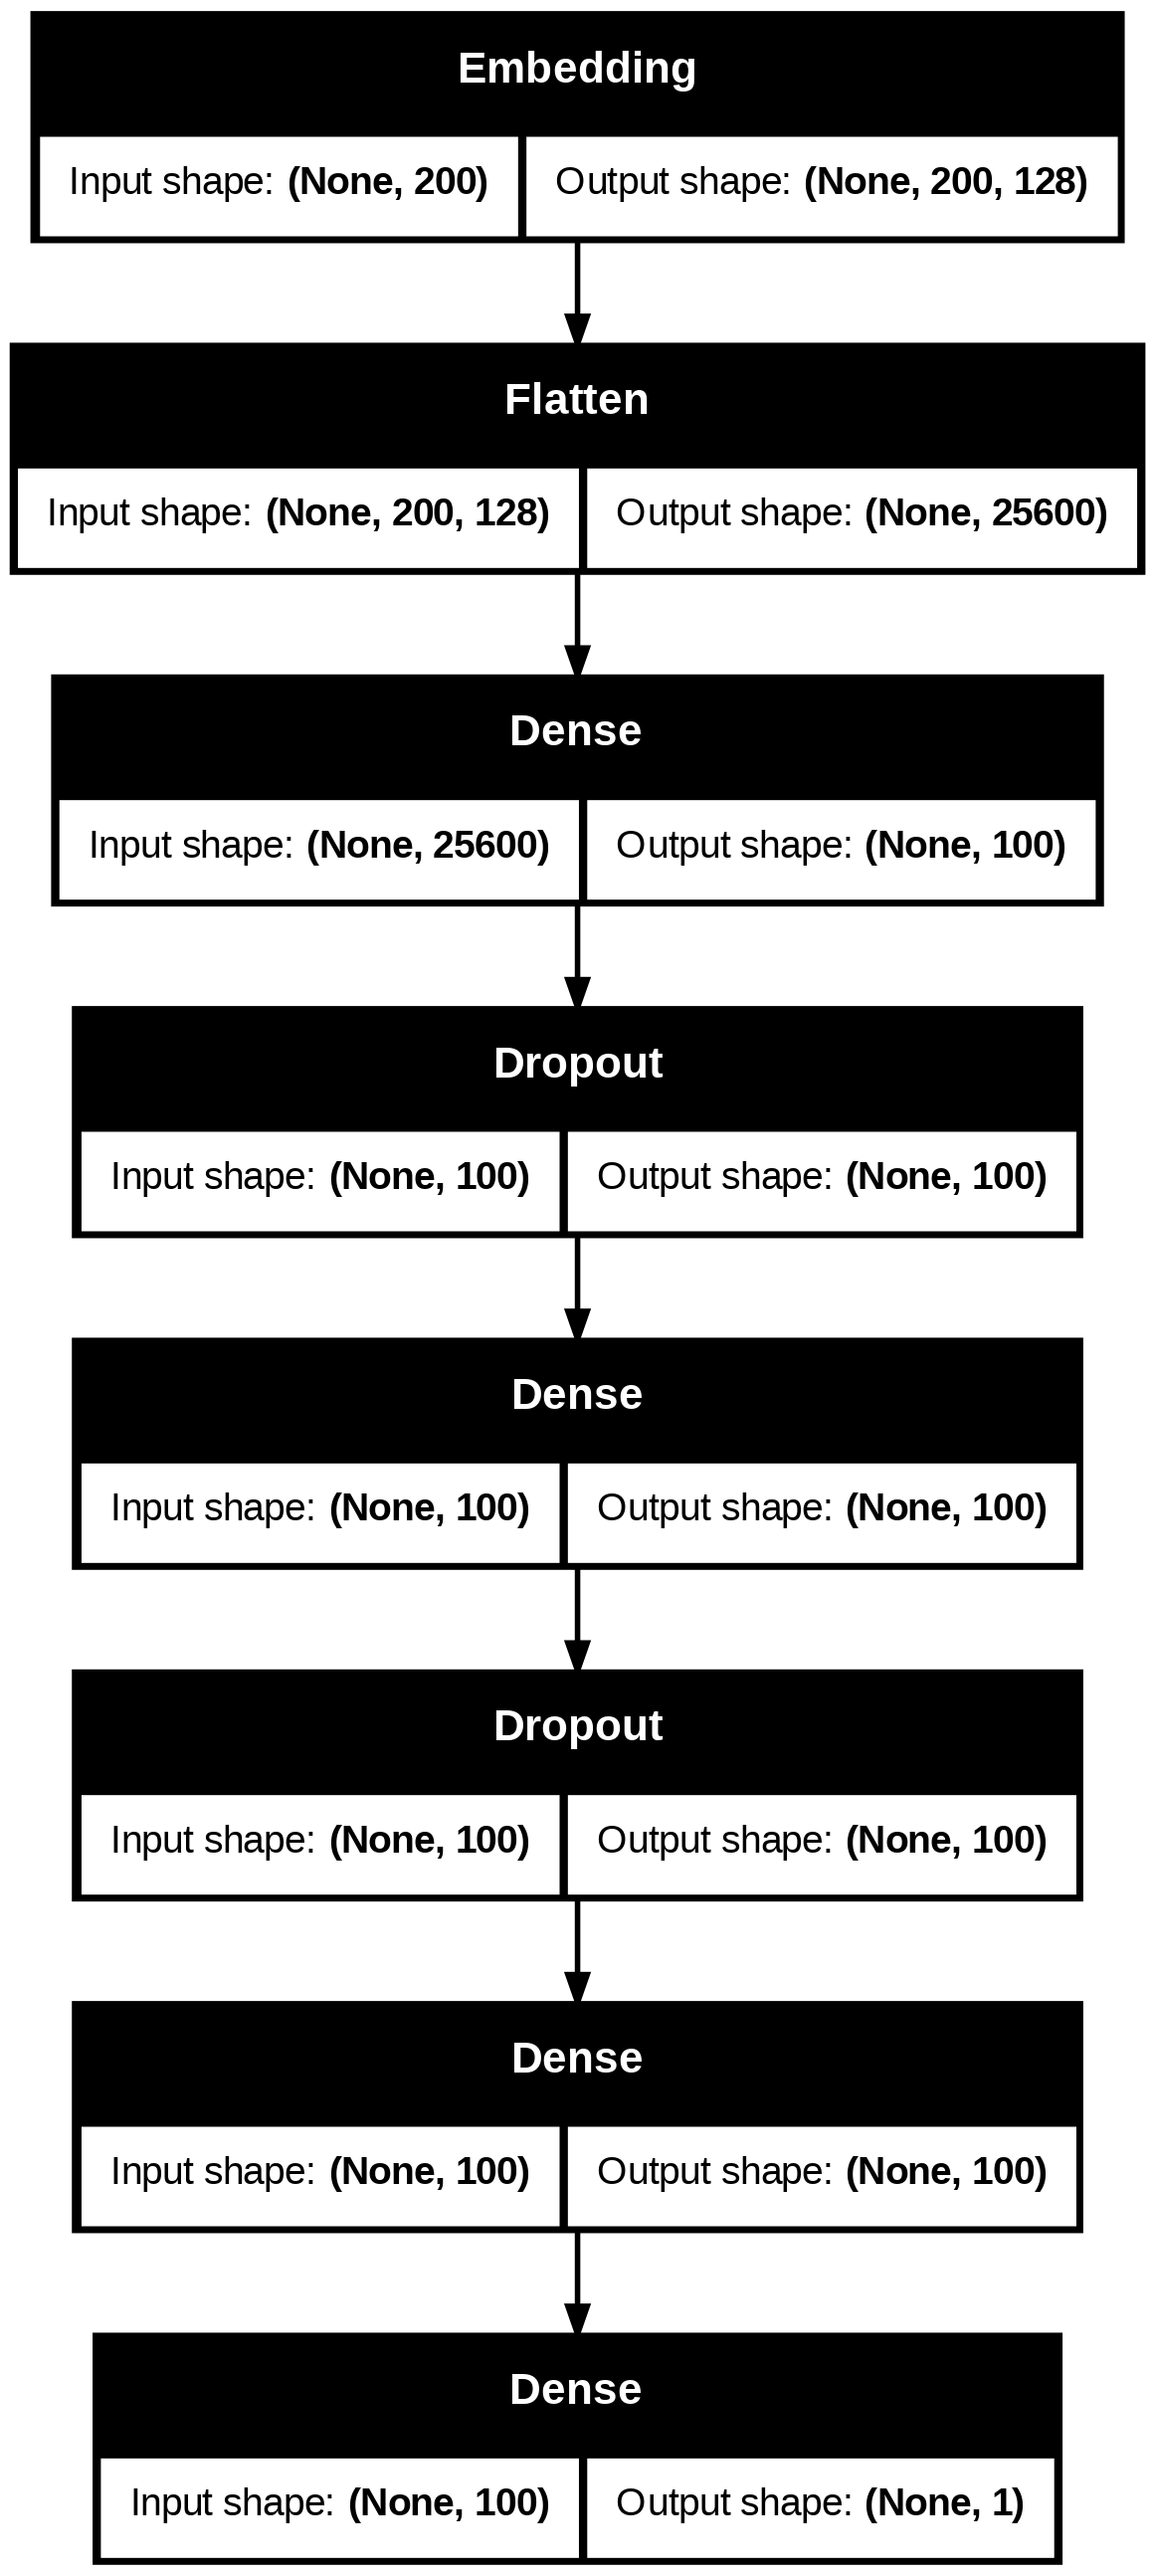

In [96]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png" , show_shapes=True)

In [95]:
loss, accuracy = model.evaluate(x_test_padded, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8465 - loss: 0.3678
Test Loss: 0.3632
Test Accuracy: 0.8483


## code i found online for this

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 50)             │       500,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 505,201 (1.93 MB)

 Trainable params: 505,201 (1.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.7214 - loss: 0.5419 - val_accuracy: 0.8932 - val_loss: 0.2647
Epoch 2/2
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9182 - loss: 0.2164 - val_accuracy: 0.8957 - val_loss: 0.2666
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8959 - loss: 0.2621


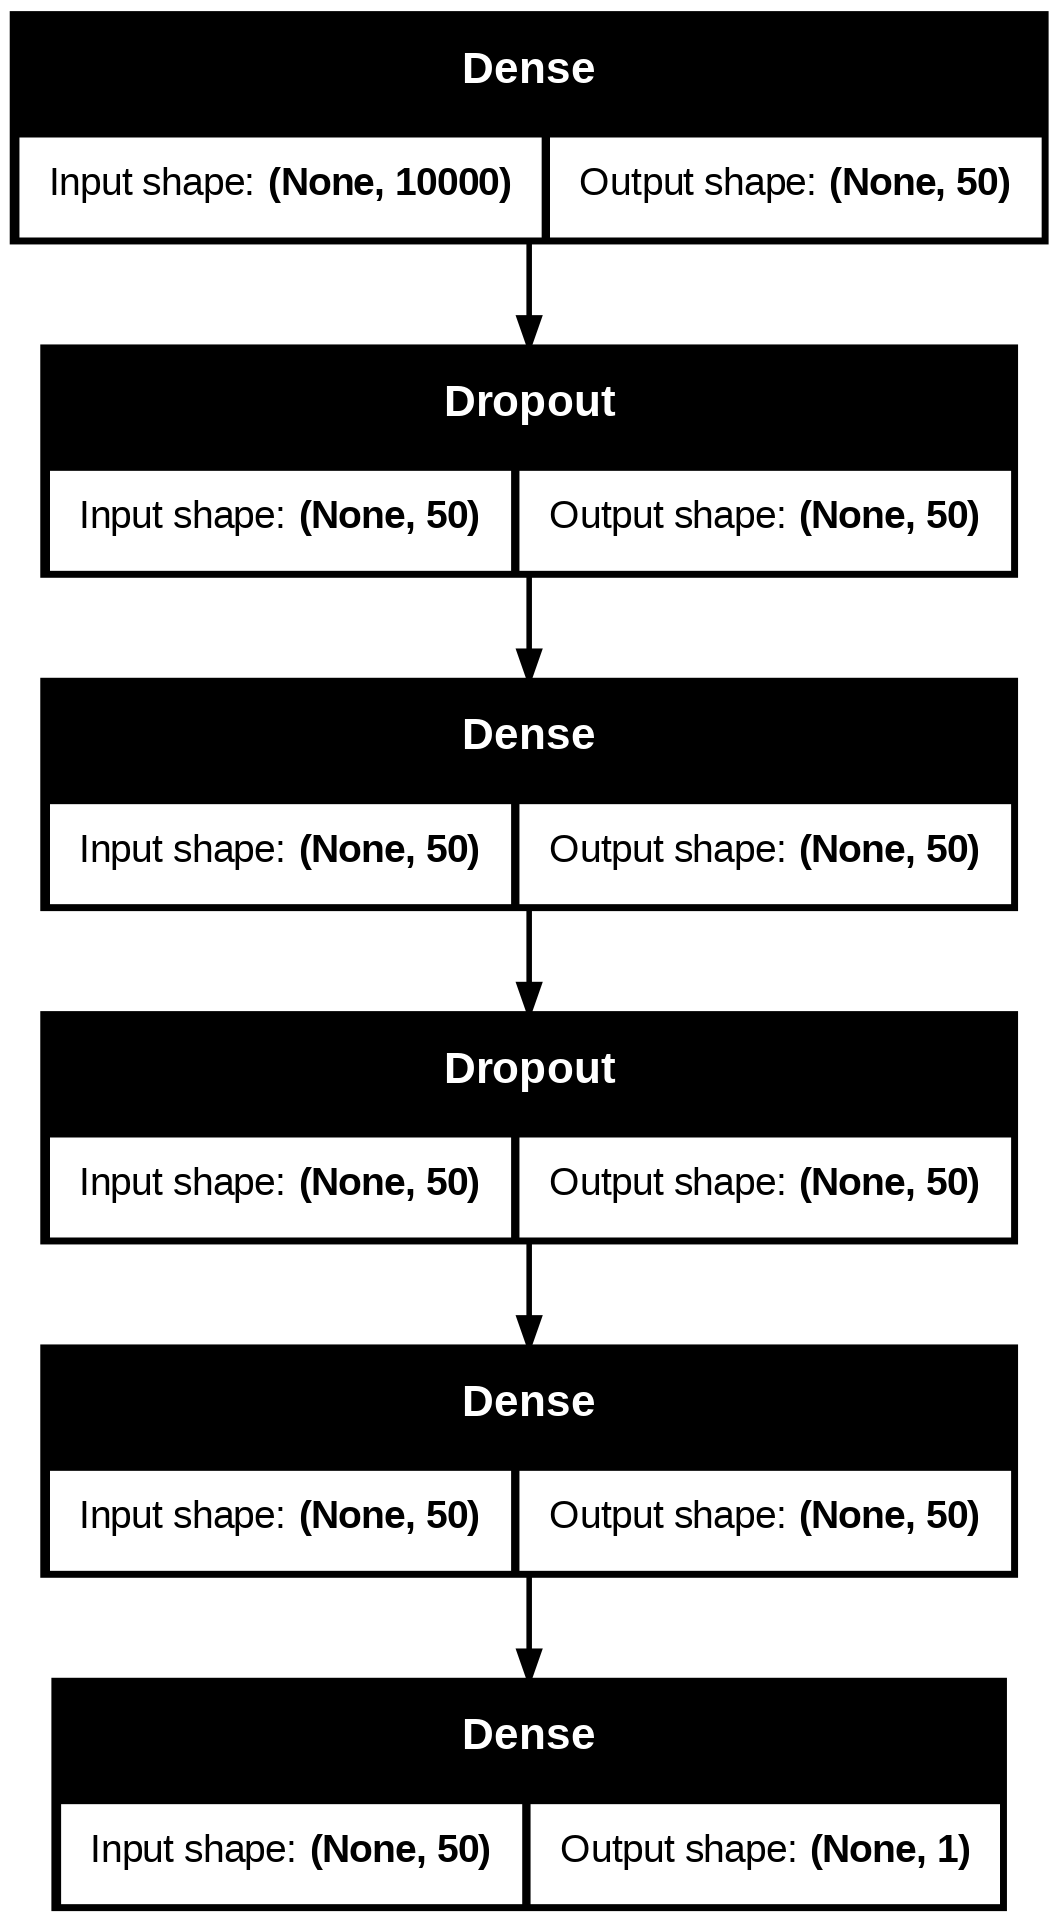

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)
def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results

data = vectorize(data)
targets = np.array(targets).astype("float32")
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 train_x, train_y,
 epochs= 2,
 batch_size = 500,
 validation_data = (test_x, test_y)
)
model.evaluate(test_x,test_y)
keras.utils.plot_model(model, "my_fashion_mnist_model.png" , show_shapes=True)
